In [505]:
# Import necessary packages
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import plotly
from plotly.graph_objs import Scatter, Layout
import plotly as py
import plotly.graph_objs as go
from IPython.display import Image


# Read in json files and create dataframes for a week in March
# Free (F) JSON data for March 13 (0313), 
filename = '2017-03-1319:13:44.248377.AppleFree.json'
data1 = pd.read_json(filename)
filename2 = '2017-03-1412:37:30.296682.AppleFree.json'
data2 = pd.read_json(filename2)
filename3 = '2017-03-1509:45:21.459935.AppleFree.json'
data3 = pd.read_json(filename3)
filename4 = '2017-03-1611:15:04.926383.AppleFree.json'
data4 = pd.read_json(filename4)
filename5 = '2017-03-2113:19:06.531592.AppleFree.json'
data5 = pd.read_json(filename5)
filename6 = '2017-03-2216:05:09.896769.AppleFree.json'
data6 = pd.read_json(filename6)
filename7 = '2017-03-2312:56:21.242598.AppleFree.json'
data7 = pd.read_json(filename7)

In [231]:
# Combining all of the data sets into one 
data = pd.concat([data1, data2,data3,data4,data5,data6,data7])
# this will be used later on
editedData = pd.concat([data1, data2,data3,data4,data5])
data

,Age Restriction,Category,Compatibility,Description,In App Purchases,Name,Number of Reviews (All Time),Number of Reviews (Current Versions),Overall Rating,Rank,Rating of Current Version,Release,Seller,Size,Version
0,Rated 12+,Utilities,"iOS 8.0 or later. Compatible with iPhone, iPad...",Bitmoji is your own personal emoji.• Create an...,No,Bitmoji - Your Personal Emoji,36742,194,4.5,1,3.5,"Mar 06, 2017",Bitstrips Inc.,80.9 MB,10.3
1,Rated 12+,Photo & Video,"iOS 8.0 or later. Compatible with iPhone, iPad...",Life's more fun when you live in the moment :)...,No,Snapchat,305377,1498,2.5,2,3.0,"Mar 03, 2017","Snap, Inc.",193 MB,10.3.1.0
2,You must be at least 17 years old to download ...,Photo & Video,"iOS 8.0 or later. Compatible with iPhone, iPad...",Get the official YouTube app for iPhone and iP...,Yes,"YouTube - Watch and Share Videos, Music & Clips",266162,1983,2.5,3,3.0,"Feb 28, 2017","Google, Inc.",114 MB,12.07
3,Rated 12+,Photo & Video,"iOS 8.0 or later. Compatible with iPhone, iPad...",Instagram is a simple way to capture and share...,No,Instagram,Information Not Available,2139158,Information Not Available,4,4.5,"Mar 13, 2017",Information Not Available,94.7 MB,10.12
4,Rated 4+,Sports,"iOS 9.0 or later. Compatible with iPhone, iPad...",The #1 bracket app is back and better than eve...,No,ESPN Tournament Challenge,39157,30,4,5,3.5,"Mar 09, 2017",ESPN Inc.,69.0 MB,5.5.2
5,Rated 12+,Navigation,"iOS 8.0 or later. Compatible with iPhone, iPad...",Google Maps makes navigating your world faster...,No,Google Maps - Navigation & Transit,150646,857,4.5,6,4.0,"Feb 28, 2017",Information Not Available,102 MB,4.28.1
6,Rated 4+,Social Networking,"iOS 8.0 or later. Compatible with iPhone, iPad...",Instantly reach the people in your life—for fr...,No,Messenger,343825,1288,3,7,2.5,"Mar 08, 2017",Information Not Available,262 MB,108.0
7,Rated 4+,Games,"iOS 7.0 or later. Compatible with iPhone, iPad...","World's best words puzzle game ""Word Cookies""T...",Yes,Word Cookies!,157238,9634,4.5,8,4.5,"Mar 09, 2017",BitMango Corporation,113 MB,1.2
8,Rated 4+,Travel,"iOS 8.0 or later. Compatible with iPhone, iPad...","Uber is a ridesharing app for fast, reliable r...",No,Uber,46848,391,3.5,9,2.0,"Mar 06, 2017",Information Not Available,220 MB,3.235.1
9,Rated 4+,Social Networking,"iOS 8.0 or later. Compatible with iPhone, iPad...",Keeping up with friends is faster than ever. •...,No,Facebook,2961502,2484,3.5,10,4.0,"Mar 10, 2017","Facebook, Inc.",328 MB,83.0


In [232]:
# Cleaning the data
# Cleaning the 'Description' column
data['Description'].replace({'\u00a0': '', 
                          '\u2022' : '',
                          '\u2013' : '',
                          '\u00ae' : '',
                          '\u2019' : '',
                          '\u2122' : '',
                          '\u2014' : '',
                          '\u00b7' : '',
                          '\u2013' : ''
                         }, inplace=True)

# Cleaning the the 'Compatibility' column, all of them have the \u00a0 error
data['Compatibility'].replace({'\u00a0': ''}, inplace=True)

In [233]:
data['Age Restriction'].replace({'Rated 4+': '4+',
                                'Rated 9+': '9+',
                                'Rated 12+ ': '12+',
                                'You must be at least 17 years old to download this app.': '17+',}
                                , inplace=True)

In [234]:
# There are 20 different Categories used in this set of Apps
categoriesUsed = set(data.Category)

# There are 24 categories described by Apple on their "Choosing A Category" 
# page (https://developer.apple.com/app-store/categories/)

categoriesArray = ['Books','Health & Fitness','Photo & Video','Business',
                   'Lifestyle','Productivity','Catalogs','Kids','Reference',
                   'Education','Magazines & Newspapers','Shopping',
                   'Entertainment', 'Medical','Social Networking','Finance',
                   'Music','Sports', 'Food & Drink','Navigation','Travel',
                   'Games','News','Utilities'] 
availCategories = set(categoriesArray) 

unusedCategories = availCategories - categoriesUsed 

# There is one outlier category, 'Weather' that is not recognized on the 
# current Apple desciption on categories but it is used to describe on App
weirdCategory = categoriesUsed - availCategories
unusedCategories

{'Business', 'Catalogs', 'Kids', 'Magazines & Newspapers', 'Medical'}

In [235]:
# There is one App under the category Weather and it shows up in 4/7 of the datasets
data[data.Category == 'Weather'].get("Name")

48    The Weather Channel: Alerts, Forecast & Radar
27    The Weather Channel: Alerts, Forecast & Radar
27    The Weather Channel: Alerts, Forecast & Radar
74    The Weather Channel: Alerts, Forecast & Radar
Name: Name, dtype: object

In [236]:
# Getting rid of some of the columns (Flutuating numbers) from the 'editedData' so that duplicates can be removed.
editedData = data[['Name','Category']]
editedData

,Name,Category
0,Bitmoji - Your Personal Emoji,Utilities
1,Snapchat,Photo & Video
2,"YouTube - Watch and Share Videos, Music & Clips",Photo & Video
3,Instagram,Photo & Video
4,ESPN Tournament Challenge,Sports
5,Google Maps - Navigation & Transit,Navigation
6,Messenger,Social Networking
7,Word Cookies!,Games
8,Uber,Travel
9,Facebook,Social Networking


In [237]:
noDupsData = editedData.drop_duplicates()
noDupsData[noDupsData.Category == 'Weather'].get("Name")

48    The Weather Channel: Alerts, Forecast & Radar
Name: Name, dtype: object

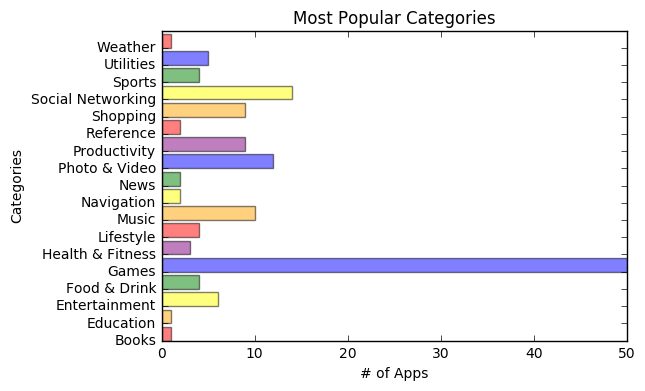

In [508]:
# Each category that is represented in the top charts
booksData = noDupsData[noDupsData['Category'].str.contains('Books')]
eduData = noDupsData[noDupsData['Category'].str.contains('Education')]
entertainData = noDupsData[noDupsData['Category'].str.contains('Entertainment')]
financeData = noDupsData[noDupsData['Category'].str.contains('Finanace')]
foodDrinkData = noDupsData[noDupsData['Category'].str.contains('Food & Drink')]
gamesData = noDupsData[noDupsData['Category'].str.contains('Games')]
healthData = noDupsData[noDupsData['Category'].str.contains('Health & Fitness')]
lifeData = noDupsData[noDupsData['Category'].str.contains('Lifestyle')]
musicData = noDupsData[noDupsData['Category'].str.contains('Music')]
navData = noDupsData[noDupsData['Category'].str.contains('Navigation')]
newsData = noDupsData[noDupsData['Category'].str.contains('News')]
photoData = noDupsData[noDupsData['Category'].str.contains('Photo & Video')]
prodData = noDupsData[noDupsData['Category'].str.contains('Productivity')]
refData = noDupsData[noDupsData['Category'].str.contains('Reference')]
shopData = noDupsData[noDupsData['Category'].str.contains('Shopping')]
socialData = noDupsData[noDupsData['Category'].str.contains('Social Networking')]
sportsData = noDupsData[noDupsData['Category'].str.contains('Sports')]
utilData = noDupsData[noDupsData['Category'].str.contains('Utilities')]
weatherData = noDupsData[noDupsData['Category'].str.contains('Weather')]

# The count of the number of apps in each category
booksCount = len(booksData)
eduCount = len(eduData)
entertainCount = len(entertainData)
financeCount = len(financeData)
foodCount = len(foodDrinkData)
gamesCount = len(gamesData)
healthCount = len(healthData)
lifeCount = len(lifeData)
musicCount = len(musicData)
navCount = len(navData)
newsCount = len(newsData)
photoCount = len(photoData)
prodCount = len(prodData)
refCount = len(refData)
shopCount = len(shopData)
socialCount = len(socialData)
sportCount = len(sportsData)
utilCount = len(utilData)
weatherCount = len(weatherData)
socialNetCount = len(socialData)

objects = ('Books','Education','Entertainment','Food & Drink','Games',
      'Health & Fitness','Lifestyle','Music','Navigation','News','Photo & Video','Productivity',
      'Reference','Shopping','Social Networking','Sports','Utilities','Weather')
y_pos = np.arange(len(objects))
performance = [booksCount,eduCount,entertainCount,foodCount,
               gamesCount,healthCount,lifeCount,musicCount,navCount,newsCount,photoCount,prodCount,refCount,
               shopCount,socialNetCount,sportCount,utilCount,weatherCount]
colors = ('red','orange','yellow','green','blue','purple','red','orange','yellow','green','blue','purple',
          'red','orange','yellow','green','blue',) 
plt.barh(y_pos, performance,alpha=0.5,color=colors)
# plt.xticks(y_pos, objects)
plt.yticks(y_pos,objects)
plt.ylabel('Categories')
plt.xlabel('# of Apps')
plt.title('Most Popular Categories')
 
plt.show()
# len(y_pos)

In [239]:
# looking at the original dataframe
data[data.Category == 'Weather'].get("Name")

48    The Weather Channel: Alerts, Forecast & Radar
27    The Weather Channel: Alerts, Forecast & Radar
27    The Weather Channel: Alerts, Forecast & Radar
74    The Weather Channel: Alerts, Forecast & Radar
Name: Name, dtype: object

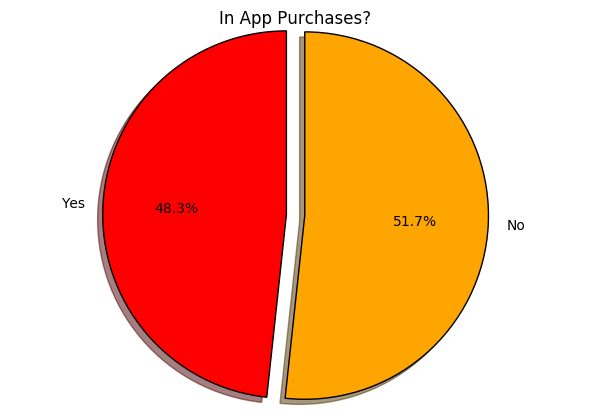

In [240]:
# Creating a data frame to look at in app purchases 
purchaseData = data[['Name','Category','In App Purchases','Age Restriction']]
purchaseData = purchaseData.drop_duplicates()

# Looking at each individual data set, most of the have the same ratio
# of in app purchases. 'data5' has the biggest diference with 60% - No and 40% - Yes

plt.pie(
    [purchaseData['In App Purchases'][purchaseData['In App Purchases'] == 'Yes'].count(),\
     purchaseData['In App Purchases'][purchaseData['In App Purchases'] == 'No'].count()],
    labels= ['Yes','No'],
    shadow=True,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0.1,0),
      startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )


plt.axis('equal')

# View the plot
plt.tight_layout()
plt.title("In App Purchases?")
plt.show()


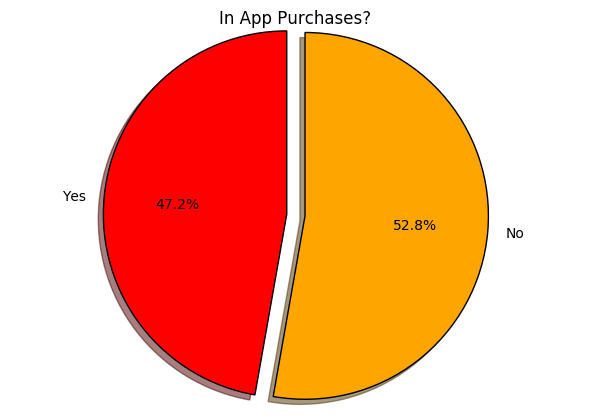

In [241]:
# In App Purchase data with version updates considered
purchaseDataWithVersion = data[['Name','Category','In App Purchases','Age Restriction','Version']]
purchaseDataWithVersion = purchaseDataWithVersion.drop_duplicates()

plt.pie(
    [purchaseDataWithVersion['In App Purchases'][purchaseDataWithVersion['In App Purchases'] == 'Yes'].count(),\
     purchaseDataWithVersion['In App Purchases'][purchaseDataWithVersion['In App Purchases'] == 'No'].count()],
    labels= ['Yes','No'],
    shadow=True,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0.1,0),
      startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

plt.axis('equal')

# View the plot
plt.tight_layout()
plt.title("In App Purchases?")
plt.show()

In [318]:
# Looking at the sellers of the apps
sellData1 = data1[['Name','Category','Seller','Rank']]
sellData2 = data2[['Name','Category','Seller','Rank']]
sellData3 = data3[['Name','Category','Seller','Rank']]
sellData4 = data4[['Name','Category','Seller','Rank']]
sellData5 = data5[['Name','Category','Seller','Rank']] #data5's seller data is inaccurate
sellData6 = data6[['Name','Category','Seller','Rank']]
sellData7 = data7[['Name','Category','Seller','Rank']]

# Drop all duplicates of the same Name only, in order to keep the Rank
sellData1 = sellData1.drop_duplicates(subset='Name')
sellData2 = sellData2.drop_duplicates(subset='Name')
sellData3 = sellData3.drop_duplicates(subset='Name')
# sellData4 = sellData4.drop_duplicates(subset='Name')
sellData5 = sellData5.drop_duplicates(subset='Name')
sellData6 = sellData6.drop_duplicates(subset='Name')
sellData7 = sellData7.drop_duplicates(subset='Name')


# Creating a data set to look at seller data, excluding 'data4
sellerData = pd.concat([sellData1, sellData2,sellData3,sellData5,sellData6,sellData7])
sellerData = sellerData.drop_duplicates(subset='Name')

googleData = sellerData[sellerData['Seller'].str.contains('Google')]
googleCount = len(googleData)

# sellerData[sellerData['Seller'].str.contains('Google')].get("Name")
# Get all ranks of Google Apps
googleRankAvg = googleData['Rank'].mean()
# Lowest Performing Google App
googleRankMin =  googleData['Rank'].max()
# Top Performing Google App
googleRankMax =  googleData['Rank'].min()
# sellerData[sellerData['Seller'].str.contains('Google')].get("Name")
# plotly offline, to avoi login conflict
init_notebook_mode(connected=True)


# Creating traces
trace0 = go.Scatter(
    x = [youtubeRank1, 9],
    y = [1, 2, 7],
    mode = 'lines+markers',
    name = 'YouTube'
)


googleScatter = [trace0]
py.offline.iplot(googleScatter, filename='scatter-mode')

In [485]:
#            Tracking the performance of Google's apps over time       #

googleData1 = sellData1[sellData1['Seller'].str.contains('Google')]
googleData2 = sellData2[sellData2['Seller'].str.contains('Google')]
googleData3 = sellData3[sellData3['Seller'].str.contains('Google')]
googleData4 = sellData4[sellData4['Seller'].str.contains('Google')]
# googleData5 = sellData5[sellData5['Seller'].str.contains('Google')]
googleData6 = sellData6[sellData6['Seller'].str.contains('Google')]
googleData7 = sellData7[sellData7['Seller'].str.contains('Google')]

# Get Rankings of the YouTube App over time
youtubeRank1 = int(googleData1[googleData1['Name'].str.contains('YouTube -')].get("Rank"))
youtubeRank2 = int(googleData2[googleData2['Name'].str.contains('YouTube -')].get("Rank"))
youtubeRank3 = int(googleData3[googleData3['Name'].str.contains('YouTube -')].get("Rank"))
youtubeRank4 = int(googleData4[googleData4['Name'].str.contains('YouTube -')].get("Rank"))
# youtubeRank5 # 5th data set is messed up
youtubeRank6 = int(googleData6[googleData6['Name'].str.contains('YouTube -')].get("Rank"))
youtubeRank7 = int(googleData7[googleData7['Name'].str.contains('YouTube -')].get("Rank"))

# Get Rankings of the Gmail App over time
gmailRank1 = int(googleData1[googleData1['Name'].str.contains('Gmail')].get("Rank"))
gmailRank2 = int(googleData2[googleData2['Name'].str.contains('Gmail')].get("Rank"))
gmailRank3 = int(googleData3[googleData3['Name'].str.contains('Gmail')].get("Rank"))
gmailRank4 = int(googleData4[googleData4['Name'].str.contains('Gmail')].get("Rank"))
# gmailRank5 # 5th data set is messed up
gmailRank6 = int(googleData6[googleData6['Name'].str.contains('Gmail')].get("Rank"))
gmailRank7 = int(googleData7[googleData7['Name'].str.contains('Gmail')].get("Rank"))

# Get Rankings of the Chrome App over time
chromeRank1 = int(googleData1[googleData1['Name'].str.contains('Chrome')].get("Rank"))
chromeRank2 = int(googleData2[googleData2['Name'].str.contains('Chrome')].get("Rank"))
chromeRank3 = int(googleData3[googleData3['Name'].str.contains('Chrome')].get("Rank"))
chromeRank4 = int(googleData4[googleData4['Name'].str.contains('Chrome')].get("Rank"))
# chromeRank5 # 5th data set is messed up
chromeRank6 = int(googleData6[googleData6['Name'].str.contains('Chrome')].get("Rank"))
chromeRank7 = int(googleData7[googleData7['Name'].str.contains('Chrome')].get("Rank"))

# Get Rankings of the Google Search App over time
searchRank1 = int(googleData1[googleData1['Name'].str.contains('Search')].get("Rank"))
searchRank2 = int(googleData2[googleData2['Name'].str.contains('Search')].get("Rank"))
searchRank3 = int(googleData3[googleData3['Name'].str.contains('Search')].get("Rank"))
searchRank4 = int(googleData4[googleData4['Name'].str.contains('Search')].get("Rank"))
# searchRank5 # 5th data set is messed up
searchRank6 = int(googleData6[googleData6['Name'].str.contains('Search')].get("Rank"))
searchRank7 = int(googleData7[googleData7['Name'].str.contains('Search')].get("Rank"))

# Get Rankings of the Google Drive App over time
driveRank1 = int(googleData1[googleData1['Name'].str.contains('Drive')].get("Rank"))
driveRank2 = int(googleData2[googleData2['Name'].str.contains('Drive')].get("Rank"))
driveRank3 = int(googleData3[googleData3['Name'].str.contains('Drive')].get("Rank"))
driveRank4 = int(googleData4[googleData4['Name'].str.contains('Drive')].get("Rank"))
# driveRank5 # 5th data set is messed up
driveRank6 = int(googleData6[googleData6['Name'].str.contains('Drive')].get("Rank"))
driveRank7 = int(googleData7[googleData7['Name'].str.contains('Drive')].get("Rank"))

# Get Rankings of the Google Photos App over time
photosRank1 = int(googleData1[googleData1['Name'].str.contains('Photos')].get("Rank"))
photosRank2 = int(googleData2[googleData2['Name'].str.contains('Photos')].get("Rank"))
photosRank3 = int(googleData3[googleData3['Name'].str.contains('Photos')].get("Rank"))
photosRank4 = int(googleData4[googleData4['Name'].str.contains('Photos')].get("Rank"))
# photosRank5 # 5th data set is messed up
photosRank6 = int(googleData6[googleData6['Name'].str.contains('Photos')].get("Rank"))
photosRank7 = int(googleData7[googleData7['Name'].str.contains('Photos')].get("Rank"))

# translateRank1 = googleData1[googleData1['Name'].str.contains('Translate')].get("Rank") #Translate is not on Chart
translateRank2 = int(googleData2[googleData2['Name'].str.contains('Translate')].get("Rank"))
translateRank3 = int(googleData3[googleData3['Name'].str.contains('Translate')].get("Rank"))
translateRank4 = int(googleData4[googleData4['Name'].str.contains('Translate')].get("Rank"))
# translateRank5 # 5th data set is messed up
translateRank6 = int(googleData6[googleData6['Name'].str.contains('Translate')].get("Rank"))
translateRank7 = int(googleData7[googleData7['Name'].str.contains('Translate')].get("Rank"))

# Get Rankings of the Google Docs App over time
docsRank1 = int(googleData1[googleData1['Name'].str.contains('Docs')].get("Rank"))
docsRank2 = int(googleData2[googleData2['Name'].str.contains('Docs')].get("Rank"))
docsRank3 = int(googleData3[googleData3['Name'].str.contains('Docs')].get("Rank"))
docsRank4 = int(googleData4[googleData4['Name'].str.contains('Docs')].get("Rank"))
# docsRank5 # 5th data set is messed up
docsRank6 = int(googleData6[googleData6['Name'].str.contains('Docs')].get("Rank"))
docsRank7 = int(googleData7[googleData7['Name'].str.contains('Docs')].get("Rank"))

# Arrays of all Ranks int
youtubeRanks = [youtubeRank1,youtubeRank2,youtubeRank3,youtubeRank4,
                youtubeRank6,youtubeRank7]

gmailRanks = [gmailRank1,gmailRank2,gmailRank3,gmailRank4,
                gmailRank6,gmailRank7]

chromeRanks = [chromeRank1,chromeRank2,chromeRank3,chromeRank4,
                chromeRank6,chromeRank7]

searchRanks = [searchRank1,searchRank2,searchRank3,searchRank4,
                searchRank6,searchRank7]

driveRanks = [driveRank1,driveRank2,driveRank3,driveRank4,
                driveRank6,driveRank7]

photoRanks = [photosRank1,photosRank2,photosRank3,photosRank4,
                photosRank6,photosRank7]

translateRanks = [0,translateRank1,translateRank3,translateRank4,
                translateRank6,translateRank7]

docRanks = [docsRank1,docsRank2,docsRank3,docsRank4,
                docsRank6,docsRank7]



# [3,5,5,5,5,7]

In [507]:
# plotly offline, to avoi login conflict
init_notebook_mode(connected=True)


# Creating traces
trace0 = go.Scatter(
    x = [1,2,3,4,6,7],
    y = [3,5,5,5,5,7],
    mode = 'lines+markers',
    name = 'YouTube'
)

trace1 = go.Scatter(
    x = [1,2,3,4,6,7],
    y = gmailRanks,
    mode = 'lines+markers',
    name = 'Gmail'
)

trace2 = go.Scatter(
    x = [1,2,3,4,6,7],
    y = chromeRanks,
    mode = 'lines+markers',
    name = 'Chrome'
)

trace3 = go.Scatter(
    x = [1,2,3,4,6,7],
    y = searchRanks,
    mode = 'lines+markers',
    name = 'Google Search'
)

trace4 = go.Scatter(
    x = [1,2,3,4,6,7],
    y = driveRanks,
    mode = 'lines+markers',
    name = 'Drive'
)

trace5 = go.Scatter(
    x = [1,2,3,4,6,7],
    y = photoRanks,
    mode = 'lines+markers',
    name = 'Photos'
)

trace6 = go.Scatter(
    x = [1,2,3,4,6,7],
    y = translateRanks,
    mode = 'lines+markers',
    name = 'Translate'
)

trace7 = go.Scatter(
    x = [1,2,3,4,6,7],
    y = docRanks,
    mode = 'lines+markers',
    name = 'Docs'
)

layout = go.Layout(
    title= 'Google App Performance',
#     hovermode= 'closest',
    xaxis= dict(
        title= 'Days',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Rank',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)



googleScatter = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7]
fig= go.Figure(data=googleScatter, layout=layout)
# py.offline.iplot(googleScatter, filename='scatter-mode',layout='layout')
py.offline.iplot(fig)

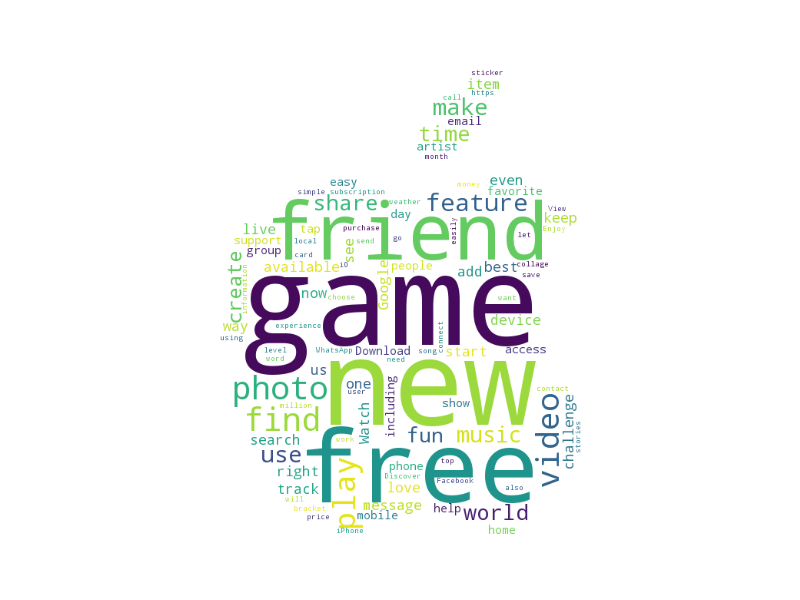

In [504]:
### Adding all descriptions (in the middle of the week) to a JSON to create a word cloud
data4['Description'].to_json('freeDesc.json')
# The word cloud is generated using another python script (appleCloud.py) in the 'Word Cloud'
# folder in the root directory 

# Display a word cloud of descriptions in the middle of the week
Image(filename='appleFreeCloud.png')